In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pulses

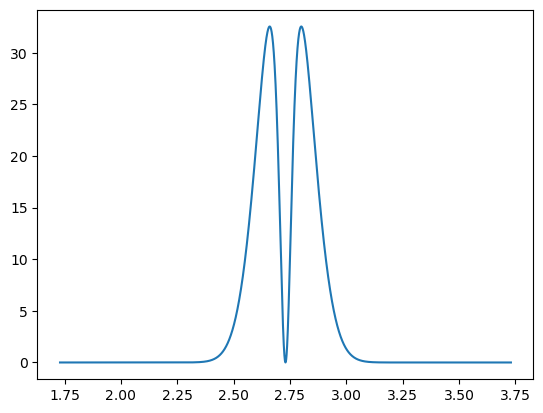

In [2]:
pulse = pulses.gaussian_pulse(2.73, .2355, 100*np.pi)
delta = .05
pulse.set_notch('sech', delta)
pulse.set_linear_chirp(600)

w_s = np.linspace(-1, 1, 10000) + 2.73
f = lambda w: pulse.spectrum(w)*pulse.notch(w)*pulse.chirp(w)
plt.plot(w_s, np.abs(f(w_s)))
#plt.plot(w_s, np.angle(f(w_s)))

In [20]:
E_ = pulse.time_dependant_field(5_000)

In [51]:
time = np.linspace(-700, 700, 20_000)
field = E_(time)

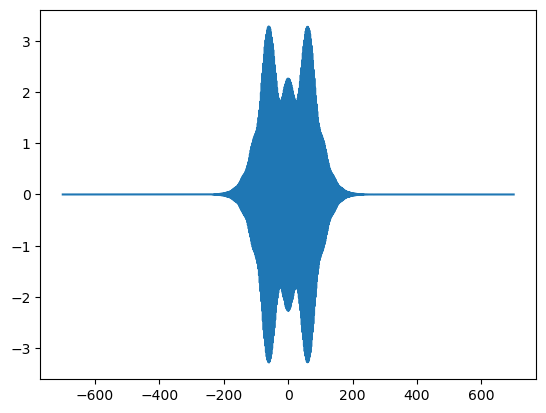

In [52]:
plt.plot(time, np.real(field))

In [ ]:

from scipy.ndimage import gaussian_filter1d
def smooth(inst_freq, sigma=2):
    return gaussian_filter1d(inst_freq, sigma=sigma)

In [54]:
def fixer(w):
    temp = w[:]
    half_lenght = w.size//2
    zero = w[half_lenght]
    
    for ii in range(1, half_lenght):
        if np.abs(w[half_lenght+ii]-zero) < np.abs(w[half_lenght-ii]-zero):
            w[half_lenght+ii] = -temp[half_lenght-ii] + 2*zero
        else:
            w[half_lenght+ii] = -temp[half_lenght-ii] + 2*zero

In [55]:
phase = np.unwrap(np.angle(field))
w_ = (phase[2:]-phase[:-2])/(time[2]-time[0])
ftime = (time[2:]+time[:-2])/2

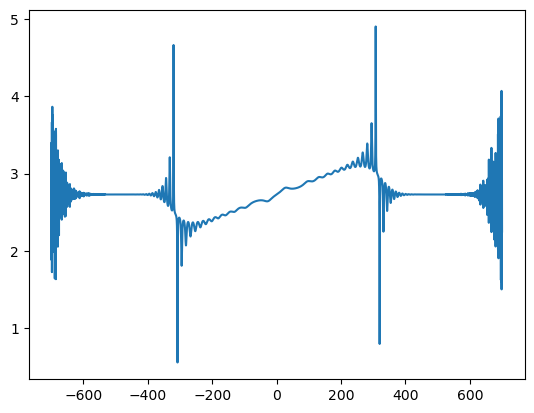

In [56]:
plt.plot(ftime, -w_)